# Random Forests Model

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image


## Loading and Preprocessing Employee Encoded Data

In [2]:
# Loading data
file_path = Path("emp_data_encoded.csv")
df_emp = pd.read_csv(file_path)
df_emp.head()



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [3]:
# Define features set
X = df_emp.copy()
X.drop("left", axis=1, inplace=True)
X.head()



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [4]:
# Define target vector
y = df_emp["left"].ravel()
y[:5]



array([1, 1, 1, 1, 1])

In [5]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)



In [6]:
# Creating StandardScaler instance
scaler = StandardScaler()



In [7]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)



In [8]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Fitting the Random Forest Model

In [9]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)



In [10]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)


## Making Predictions Using the Random Forest Model

In [11]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)


## Model Evaluation

In [12]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)



In [13]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}") 
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2850,14
Actual 1,47,839


Accuracy Score : 0.9837333333333333
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2864
           1       0.98      0.95      0.96       886

    accuracy                           0.98      3750
   macro avg       0.98      0.97      0.98      3750
weighted avg       0.98      0.98      0.98      3750



## Feature Importance

In [14]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_



In [52]:
# Sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)



[(0.35408510777626584, 'average_montly_hours'),
 (0.31600510121273045, 'number_project'),
 (0.24746838527080042, 'time_spend_company'),
 (0.017743968879998753, 'Work_accident'),
 (0.009830443442464113, 'salary_low'),
 (0.008422252231576114, 'salary_high'),
 (0.005356556880985342, 'Department_technical'),
 (0.005356151892147043, 'Department_sales'),
 (0.005298733608415974, 'Department_support'),
 (0.004978298666892086, 'salary_medium'),
 (0.0037875006637724043, 'Department_RandD'),
 (0.003576310378140694, 'Department_IT'),
 (0.003399120205532344, 'Department_hr'),
 (0.003287015467251652, 'Department_product_mng'),
 (0.0030790004463558565, 'promotion_last_5years'),
 (0.0028511810215532275, 'Department_accounting'),
 (0.0027769230317013574, 'Department_marketing'),
 (0.0026979489234164387, 'Department_management')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

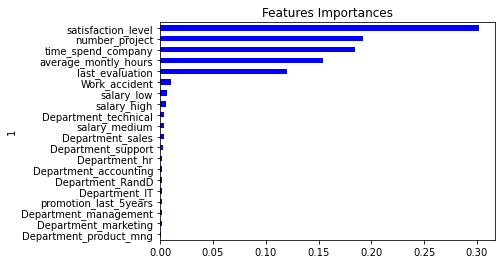

In [27]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='blue', title= 'Features Importances', legend=False)



## Loading and Preprocessing Employee Encoded Data

In [28]:
# Loading data
file_path = Path("emp_data_encoded.csv")
df_emp = pd.read_csv(file_path)
df_emp.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


## Removing the Satisfaction Level and Last Evaluation Columns

In [34]:
df_emp2 = df_emp.drop(columns=['satisfaction_level','last_evaluation'])

df_emp2.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [35]:
# Define features set
X = df_emp2.copy()
X.drop("left", axis=1, inplace=True)
X.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [36]:
# Define target vector
y = df_emp2["left"].ravel()
y[:5]

array([1, 1, 1, 1, 1])

In [37]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [38]:
# Creating StandardScaler instance
scaler = StandardScaler()


In [39]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [40]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [41]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)


In [42]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [43]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [44]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [45]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}") 
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2763,101
Actual 1,57,829


Accuracy Score : 0.9578666666666666
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2864
           1       0.89      0.94      0.91       886

    accuracy                           0.96      3750
   macro avg       0.94      0.95      0.94      3750
weighted avg       0.96      0.96      0.96      3750



## Feature Importance

In [46]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

In [49]:
# Sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.35408510777626584, 'average_montly_hours'),
 (0.31600510121273045, 'number_project'),
 (0.24746838527080042, 'time_spend_company'),
 (0.017743968879998753, 'Work_accident'),
 (0.009830443442464113, 'salary_low'),
 (0.008422252231576114, 'salary_high'),
 (0.005356556880985342, 'Department_technical'),
 (0.005356151892147043, 'Department_sales'),
 (0.005298733608415974, 'Department_support'),
 (0.004978298666892086, 'salary_medium'),
 (0.0037875006637724043, 'Department_RandD'),
 (0.003576310378140694, 'Department_IT'),
 (0.003399120205532344, 'Department_hr'),
 (0.003287015467251652, 'Department_product_mng'),
 (0.0030790004463558565, 'promotion_last_5years'),
 (0.0028511810215532275, 'Department_accounting'),
 (0.0027769230317013574, 'Department_marketing'),
 (0.0026979489234164387, 'Department_management')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

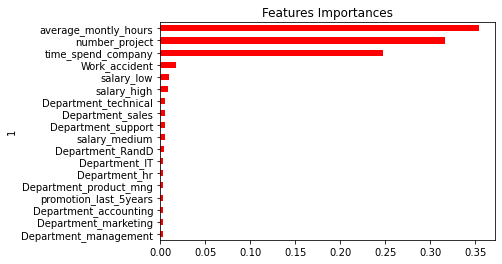

In [51]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='red', title= 'Features Importances', legend=False)
